Project

Predicting Loan Defaulters

DESCRIPTION

Financial institutions incur significant losses due to the default of vehicle loans. 
This has led to the tightening up of vehicle loan underwriting and increased the vehicle loan rejection rates. 
The need for a better credit risk scoring model among these institutions also gets created. 
This warrants a study to estimate the determinants of vehicle loan default.
There is one dataset data that has 41 attributes.
You are required to determine and examine factors that affect the ratio of vehicle loan defaulters. 
Also, use the findings to create a model to predict the potential defaulters.

In [1]:
import pandas as pd
import xlrd

In [2]:
#import data file
df_data=pd.read_excel('C:/STORAGE/DATA Analyst wit IBM/Capstone Project Data Analyst/Project 2 Predicting Loan Defaulters/Datasets/data.xlsx', 
                       sheet_name = 'train')
df_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [3]:
df_data.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [4]:
# Check data types
df_data.dtypes

UniqueID                                        int64
disbursed_amount                                int64
asset_cost                                      int64
ltv                                           float64
branch_id                                       int64
supplier_id                                     int64
manufacturer_id                                 int64
Current_pincode_ID                              int64
Date.of.Birth                          datetime64[ns]
Employment.Type                                object
DisbursalDate                          datetime64[ns]
State_ID                                        int64
Employee_code_ID                                int64
MobileNo_Avl_Flag                               int64
Aadhar_flag                                     int64
PAN_flag                                        int64
VoterID_flag                                    int64
Driving_flag                                    int64
Passport_flag               

In [5]:
#check columns for NaN values
df_data.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [6]:
# check for duplicates
df_data.duplicated(subset=None, keep='first').sum()

0

In [7]:
#Change column names according to Python requirements
col_names= []
for col in list(df_data.columns.values):
    col = col.replace(".","_")
    col = col.replace(" ","")
    col_names.append(col)

In [8]:
col_names

['UniqueID',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'Date_of_Birth',
 'Employment_Type',
 'DisbursalDate',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS_SCORE',
 'PERFORM_CNS_SCORE_DESCRIPTION',
 'PRI_NO_OF_ACCTS',
 'PRI_ACTIVE_ACCTS',
 'PRI_OVERDUE_ACCTS',
 'PRI_CURRENT_BALANCE',
 'PRI_SANCTIONED_AMOUNT',
 'PRI_DISBURSED_AMOUNT',
 'SEC_NO_OF_ACCTS',
 'SEC_ACTIVE_ACCTS',
 'SEC_OVERDUE_ACCTS',
 'SEC_CURRENT_BALANCE',
 'SEC_SANCTIONED_AMOUNT',
 'SEC_DISBURSED_AMOUNT',
 'PRIMARY_INSTAL_AMT',
 'SEC_INSTAL_AMT',
 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
 'AVERAGE_ACCT_AGE',
 'CREDIT_HISTORY_LENGTH',
 'NO_OF_INQUIRIES',
 'loan_default']

In [9]:
# Rename DataFrame columns
df_data.columns = list(map(str, col_names))
df_data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [10]:
# Check data types
df_data.dtypes

UniqueID                                        int64
disbursed_amount                                int64
asset_cost                                      int64
ltv                                           float64
branch_id                                       int64
supplier_id                                     int64
manufacturer_id                                 int64
Current_pincode_ID                              int64
Date_of_Birth                          datetime64[ns]
Employment_Type                                object
DisbursalDate                          datetime64[ns]
State_ID                                        int64
Employee_code_ID                                int64
MobileNo_Avl_Flag                               int64
Aadhar_flag                                     int64
PAN_flag                                        int64
VoterID_flag                                    int64
Driving_flag                                    int64
Passport_flag               

In [11]:
#check columns for NaN values
df_data.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [12]:
# column Employment_Type contents non-numeric values. Let's check them
df_data.Employment_Type.unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [13]:
#Replace value "Self employed" with "Self_employed" - for further use as column name
df_data.Employment_Type.replace('Self employed',"Self_employed", inplace= True)

In [14]:
#Check numbers of each category
pd.value_counts(df_data ["Employment_Type"]) 

Self_employed    127635
Salaried          97858
Name: Employment_Type, dtype: int64

In [15]:
df_data.Employment_Type.isna().sum()

7661

In [16]:
# Let's replace NaN values with the Mode. In our case mode = "Self employed"
df_data ["Employment_Type"] = df_data ["Employment_Type"].fillna("Self_employed")

In [17]:
pd.value_counts(df_data ["Employment_Type"]) 

Self_employed    135296
Salaried          97858
Name: Employment_Type, dtype: int64

<AxesSubplot:>

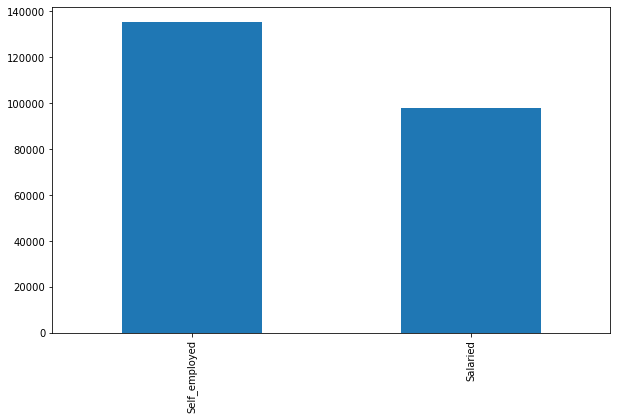

In [18]:
# get visual representation
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

pd.value_counts(df_data ["Employment_Type"]).plot(kind='bar', figsize=(10, 6))

In [19]:
# Replace "Self employed" and "Salaried" with dummies
pd.get_dummies(df_data ["Employment_Type"])

,Salaried,Self_employed
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
233149,0,1
233150,0,1
233151,0,1
233152,0,1


In [20]:
#create 2 new columns from dummy variables (instead of Employment_Type column)
df_data ["Salaried"] = pd.get_dummies(df_data ["Employment_Type"]).Salaried

In [21]:
df_data ["Self_employed"] = pd.get_dummies(df_data ["Employment_Type"]).Self_employed

In [22]:
df_data.drop(["Employment_Type"], axis=1, inplace = True)
df_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,DisbursalDate,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Salaried,Self_employed
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,2018-08-03,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,2018-08-01,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,1
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,2018-09-26,...,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,0,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,2018-09-23,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,2018-10-08,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,1


In [23]:
# Check data types
df_data.dtypes

UniqueID                                        int64
disbursed_amount                                int64
asset_cost                                      int64
ltv                                           float64
branch_id                                       int64
supplier_id                                     int64
manufacturer_id                                 int64
Current_pincode_ID                              int64
Date_of_Birth                          datetime64[ns]
DisbursalDate                          datetime64[ns]
State_ID                                        int64
Employee_code_ID                                int64
MobileNo_Avl_Flag                               int64
Aadhar_flag                                     int64
PAN_flag                                        int64
VoterID_flag                                    int64
Driving_flag                                    int64
Passport_flag                                   int64
PERFORM_CNS_SCORE           

Columns "AVERAGE_ACCT_AGE" and "CREDIT_HISTORY_LENGTH" have unappropriate data format but can contain a sensitive information for our study. Let's convert data from "0yrs 0mon" to number of months. We'll try to do it with help of RegEx

In [24]:
# let's check if there are some cells containing values than match the main pattern "00yrs 00mon"
import re

for pattern in df_data ["AVERAGE_ACCT_AGE"]:
    y = re.findall("^\d+yrs \d+mon", pattern)
    if pattern not in y[0]:
        print (pattern)

In [25]:
#Let's combine loop with RegEX to replace values in df_data ["AVERAGE_ACCT_AGE"] with values in proper format (number in months)
for i in df_data.index:
    y = re.findall("^\d+yrs", df_data.loc [i,"AVERAGE_ACCT_AGE"]) # returns list
    years_in_mnth = 12*int(re.findall("^\d+", y[0])[0])# re.findall("^\d+", y[0]) returns a list, so we need its [0] value
    m = re.findall(" \d+mon", df_data.loc [i,"AVERAGE_ACCT_AGE"])# returns list
    months = int (re.findall("\d+", m[0])[0])
    ACCT_AGE = years_in_mnth+months
    df_data.loc [i,"AVERAGE_ACCT_AGE"] = ACCT_AGE

In [26]:
df_data ["AVERAGE_ACCT_AGE"].tail()

233149    28
233150    17
233151     9
233152    14
233153    35
Name: AVERAGE_ACCT_AGE, dtype: object

In [27]:
# Let's perform the steps above for another column "CREDIT_HISTORY_LENGTH"
df_data ["CREDIT_HISTORY_LENGTH"].head()

0    0yrs 0mon
1    0yrs 0mon
2    0yrs 0mon
3    0yrs 0mon
4    0yrs 0mon
Name: CREDIT_HISTORY_LENGTH, dtype: object

In [28]:
for pattern in df_data ["CREDIT_HISTORY_LENGTH"]:
    y = re.findall("^\d+yrs \d+mon", pattern)
    if pattern not in y[0]:
        print (pattern)

In [29]:
for i in df_data.index:
    y = re.findall("^\d+yrs", df_data.loc [i,"CREDIT_HISTORY_LENGTH"]) # returns list
    years_in_mnth = 12*int(re.findall("^\d+", y[0])[0])# re.findall("^\d+", y[0]) returns a list, so we need its [0] value
    m = re.findall(" \d+mon", df_data.loc [i,"CREDIT_HISTORY_LENGTH"])# returns list
    months = int (re.findall("\d+", m[0])[0])
    HISTORY_AGE = years_in_mnth+months
    df_data.loc [i,"CREDIT_HISTORY_LENGTH"] = HISTORY_AGE

In [30]:
df_data ["CREDIT_HISTORY_LENGTH"].tail()

233149    28
233150    17
233151    46
233152    38
233153    64
Name: CREDIT_HISTORY_LENGTH, dtype: object

In [31]:
df_data ['PERFORM_CNS_SCORE_DESCRIPTION'].head()

0    No Bureau History Available
1    No Bureau History Available
2    No Bureau History Available
3    No Bureau History Available
4    No Bureau History Available
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: object

In [32]:
# column PERFORM_CNS_SCORE_DESCRIPTION contents non-numeric values. Let's check them
df_data.PERFORM_CNS_SCORE_DESCRIPTION.unique()

array(['No Bureau History Available', 'A-Very Low Risk',
       'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk',
       'E-Low Risk', 'F-Low Risk', 'G-Low Risk', 'H-Medium Risk',
       'I-Medium Risk', 'J-High Risk', 'K-High Risk', 'L-Very High Risk',
       'M-Very High Risk',
       'Not Scored: No Updates available in last 36 months',
       'Not Scored: Not Enough Info available on the customer',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

Column PERFORM_CNS_SCORE_DESCRIPTION contains data of 20 cathegories. To implement them into Machine-Learning 
model all them have to be converted into dummies. For a simplify a little our task I'll combine most of "Not Scored"
into one cathegory: 

'Not Scored = 'No Bureau History Available', 'Not Scored: No Updates available in last 36 months','Not Scored: Not Enough Info available on the customer', 'Not Scored: No Activity seen on the customer (Inactive)','Not Scored: Sufficient History Not Available' 

The rest two 'Not Scored: Only a Guarantor' and 'Not Scored: More than 50 active Accounts found'] can contain valuable
data. We'll keep them separately

We'll combine steps of combining cathegories with converting values into proper format - for further use as column name

In [33]:
df_data.PERFORM_CNS_SCORE_DESCRIPTION=df_data.PERFORM_CNS_SCORE_DESCRIPTION.str.replace('No Bureau History Available',"Not_Scored")
df_data.PERFORM_CNS_SCORE_DESCRIPTION=df_data.PERFORM_CNS_SCORE_DESCRIPTION.str.replace('Not Scored: No Updates available in last 36 months',"Not_Scored")
df_data.PERFORM_CNS_SCORE_DESCRIPTION=df_data.PERFORM_CNS_SCORE_DESCRIPTION.str.replace('Not Scored: Not Enough Info available on the customer',"Not_Scored")
df_data.PERFORM_CNS_SCORE_DESCRIPTION=df_data.PERFORM_CNS_SCORE_DESCRIPTION.str.replace("Not_Scored_No_Activity_seen_on_the_customer_(Inactive)","Not_Scored")
df_data.PERFORM_CNS_SCORE_DESCRIPTION=df_data.PERFORM_CNS_SCORE_DESCRIPTION.str.replace('Not Scored: Sufficient History Not Available',"Not_Scored")
df_data.PERFORM_CNS_SCORE_DESCRIPTION=df_data.PERFORM_CNS_SCORE_DESCRIPTION.str.replace("-","_")
df_data.PERFORM_CNS_SCORE_DESCRIPTION=df_data.PERFORM_CNS_SCORE_DESCRIPTION.str.replace(" ","_")
df_data.PERFORM_CNS_SCORE_DESCRIPTION=df_data.PERFORM_CNS_SCORE_DESCRIPTION.str.replace(":","")

C:\Users\winpr\AppData\Local\Temp/ipykernel_8280/2075970869.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_data.PERFORM_CNS_SCORE_DESCRIPTION=df_data.PERFORM_CNS_SCORE_DESCRIPTION.str.replace("Not_Scored_No_Activity_seen_on_the_customer_(Inactive)","Not_Scored")


In [34]:
df_data.PERFORM_CNS_SCORE_DESCRIPTION.unique()

array(['Not_Scored', 'A_Very_Low_Risk', 'B_Very_Low_Risk',
       'C_Very_Low_Risk', 'D_Very_Low_Risk', 'E_Low_Risk', 'F_Low_Risk',
       'G_Low_Risk', 'H_Medium_Risk', 'I_Medium_Risk', 'J_High_Risk',
       'K_High_Risk', 'L_Very_High_Risk', 'M_Very_High_Risk',
       'Not_Scored_No_Activity_seen_on_the_customer_(Inactive)',
       'Not_Scored_Only_a_Guarantor',
       'Not_Scored_More_than_50_active_Accounts_found'], dtype=object)

In [35]:
pd.get_dummies(df_data ['PERFORM_CNS_SCORE_DESCRIPTION'])

,A_Very_Low_Risk,B_Very_Low_Risk,C_Very_Low_Risk,D_Very_Low_Risk,E_Low_Risk,F_Low_Risk,G_Low_Risk,H_Medium_Risk,I_Medium_Risk,J_High_Risk,K_High_Risk,L_Very_High_Risk,M_Very_High_Risk,Not_Scored,Not_Scored_More_than_50_active_Accounts_found,Not_Scored_No_Activity_seen_on_the_customer_(Inactive),Not_Scored_Only_a_Guarantor
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
233150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
233151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
233152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
df_data ["A_Very_Low_Risk"] = pd.get_dummies(df_data ["PERFORM_CNS_SCORE_DESCRIPTION"]).A_Very_Low_Risk
df_data ["B_Very_Low_Risk"] = pd.get_dummies(df_data ["PERFORM_CNS_SCORE_DESCRIPTION"]).B_Very_Low_Risk
df_data ["C_Very_Low_Risk"] = pd.get_dummies(df_data ["PERFORM_CNS_SCORE_DESCRIPTION"]).C_Very_Low_Risk
df_data ["D_Very_Low_Risk"] = pd.get_dummies(df_data ["PERFORM_CNS_SCORE_DESCRIPTION"]).D_Very_Low_Risk
df_data ["E_Low_Risk"] = pd.get_dummies(df_data ["PERFORM_CNS_SCORE_DESCRIPTION"]).E_Low_Risk
df_data ["F_Low_Risk"] = pd.get_dummies(df_data ["PERFORM_CNS_SCORE_DESCRIPTION"]).F_Low_Risk
df_data ["G_Low_Risk"] = pd.get_dummies(df_data ["PERFORM_CNS_SCORE_DESCRIPTION"]).G_Low_Risk
df_data ["H_Medium_Risk"] = pd.get_dummies(df_data ["PERFORM_CNS_SCORE_DESCRIPTION"]).H_Medium_Risk
df_data ["I_Medium_Risk"] = pd.get_dummies(df_data ["PERFORM_CNS_SCORE_DESCRIPTION"]).I_Medium_Risk
df_data ["J_High_Risk"] = pd.get_dummies(df_data ["PERFORM_CNS_SCORE_DESCRIPTION"]).J_High_Risk
df_data ["K_High_Risk"] = pd.get_dummies(df_data ["PERFORM_CNS_SCORE_DESCRIPTION"]).K_High_Risk
df_data ["L_Very_High_Risk"] = pd.get_dummies(df_data ["PERFORM_CNS_SCORE_DESCRIPTION"]).L_Very_High_Risk
df_data ["M_Very_High_Risk"] = pd.get_dummies(df_data ["PERFORM_CNS_SCORE_DESCRIPTION"]).M_Very_High_Risk
df_data ["Not_Scored"] = pd.get_dummies(df_data ["PERFORM_CNS_SCORE_DESCRIPTION"]).Not_Scored
df_data ["Not_Scored_More_than_50_active_Accounts_found"] = pd.get_dummies(df_data ["PERFORM_CNS_SCORE_DESCRIPTION"]).Not_Scored_More_than_50_active_Accounts_found
df_data ["Not_Scored_Only_a_Guarantor"] = pd.get_dummies(df_data ["PERFORM_CNS_SCORE_DESCRIPTION"]).Not_Scored_Only_a_Guarantor

df_data.drop(["PERFORM_CNS_SCORE_DESCRIPTION"], axis=1, inplace = True)
df_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,DisbursalDate,...,G_Low_Risk,H_Medium_Risk,I_Medium_Risk,J_High_Risk,K_High_Risk,L_Very_High_Risk,M_Very_High_Risk,Not_Scored,Not_Scored_More_than_50_active_Accounts_found,Not_Scored_Only_a_Guarantor
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,2018-08-03,...,0,0,0,0,0,0,0,1,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,2018-08-01,...,0,0,0,0,0,0,0,1,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,2018-09-26,...,0,0,0,0,0,0,0,1,0,0
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,2018-09-23,...,0,0,0,0,0,0,0,1,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,2018-10-08,...,0,0,0,0,0,0,0,1,0,0


In [37]:
# Check data types
df_data.dtypes

UniqueID                                                  int64
disbursed_amount                                          int64
asset_cost                                                int64
ltv                                                     float64
branch_id                                                 int64
supplier_id                                               int64
manufacturer_id                                           int64
Current_pincode_ID                                        int64
Date_of_Birth                                    datetime64[ns]
DisbursalDate                                    datetime64[ns]
State_ID                                                  int64
Employee_code_ID                                          int64
MobileNo_Avl_Flag                                         int64
Aadhar_flag                                               int64
PAN_flag                                                  int64
VoterID_flag                            

In [38]:
#convert columns AVERAGE_ACCT_AGE, CREDIT_HISTORY_LENGTH to int 
df_data['AVERAGE_ACCT_AGE'] = df_data['AVERAGE_ACCT_AGE'].astype(int)
df_data['CREDIT_HISTORY_LENGTH'] = df_data['CREDIT_HISTORY_LENGTH'].astype(int)

In [39]:
# Check data types
df_data['AVERAGE_ACCT_AGE'].dtype

dtype('int32')

In [40]:
df_data['AVERAGE_ACCT_AGE'].tail()

233149    28
233150    17
233151     9
233152    14
233153    35
Name: AVERAGE_ACCT_AGE, dtype: int32

In [41]:
df_data['CREDIT_HISTORY_LENGTH'].dtype

dtype('int32')

In [42]:
df_data['CREDIT_HISTORY_LENGTH'].tail()

233149    28
233150    17
233151    46
233152    38
233153    64
Name: CREDIT_HISTORY_LENGTH, dtype: int32

In [43]:
# Let's take a closer look at our potential Dependent variable (Y)
df_data['loan_default'].head()

0    0
1    0
2    1
3    0
4    0
Name: loan_default, dtype: int64

In [44]:
# we'll use correlation matrix and hitmap to reveal ralations between variables in the model
tc= df_data.corr()
tc

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,G_Low_Risk,H_Medium_Risk,I_Medium_Risk,J_High_Risk,K_High_Risk,L_Very_High_Risk,M_Very_High_Risk,Not_Scored,Not_Scored_More_than_50_active_Accounts_found,Not_Scored_Only_a_Guarantor
UniqueID,1.000000,0.145575,0.144671,-0.030537,-0.004509,0.025747,-0.021514,0.030500,-0.057734,0.075983,...,0.004097,-0.001380,-0.000398,0.001380,-0.004166,0.003172,-0.009662,0.015100,-0.000281,-0.001539
disbursed_amount,0.145575,1.000000,0.752668,0.376747,0.018328,0.078596,0.095203,0.068540,-0.023956,0.010120,...,0.008000,0.007558,0.011494,0.012383,0.011958,0.003140,0.013028,-0.019627,-0.004280,-0.003622
asset_cost,0.144671,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.005256,0.275878,-0.026348,0.008711,...,-0.003309,-0.005816,-0.003208,0.004745,-0.003581,-0.001250,-0.015691,0.045906,-0.002931,-0.000601
ltv,-0.030537,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.121003,-0.300112,0.004882,0.004940,...,0.015841,0.019743,0.022694,0.011529,0.024766,0.007074,0.043829,-0.095801,-0.002290,-0.004376
branch_id,-0.004509,0.018328,0.018586,0.006382,1.000000,0.225744,-0.049957,0.048192,0.187782,0.088764,...,0.001491,0.003662,0.003371,0.001664,-0.001438,-0.000307,-0.008612,0.016559,0.001356,0.007489
supplier_id,0.025747,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.105502,0.095792,...,-0.006042,-0.006517,-0.006420,-0.008192,-0.017681,-0.006171,-0.037753,0.084299,-0.001650,0.004743
manufacturer_id,-0.021514,0.095203,-0.005256,0.121003,-0.049957,-0.063916,1.000000,-0.104349,0.026412,-0.045009,...,0.012847,0.008880,0.004460,0.005543,0.011357,-0.000799,0.017842,-0.074896,-0.003731,-0.003184
Current_pincode_ID,0.030500,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.047903,-0.042609,...,-0.013076,-0.014441,-0.016058,-0.012986,-0.032201,-0.002520,-0.045741,0.165243,-0.004424,0.005746
State_ID,-0.057734,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.026412,0.047903,1.000000,0.117309,...,0.000311,0.002205,0.001918,-0.001087,-0.002361,-0.002041,-0.004814,0.038029,-0.000210,0.003247
Employee_code_ID,0.075983,0.010120,0.008711,0.004940,0.088764,0.095792,-0.045009,-0.042609,0.117309,1.000000,...,0.006062,0.004699,0.005239,0.002760,-0.000403,0.002125,0.001617,0.002446,-0.003181,-0.000037


In [45]:
# it appears that column MobileNo_Avl_Flag still contains data in the object data format
df_data['MobileNo_Avl_Flag'].head()

0    1
1    1
2    1
3    1
4    1
Name: MobileNo_Avl_Flag, dtype: int64

In [46]:
df_data['MobileNo_Avl_Flag'] = df_data['MobileNo_Avl_Flag'].astype(int)
df_data.MobileNo_Avl_Flag.unique()

array([1])

Variable MobileNo_Avl_Flag contains following info: "if Mobile no. was shared by the customer then flagged as 1"
According to all the cells contain same value 1, variable doesn't bring any aaditional sence to model 
and can be dropped

In [47]:
df_data.drop(["MobileNo_Avl_Flag"], axis=1, inplace = True)

In [48]:
#let's rerun the correlation matrix
tc= df_data.corr()
tc

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,G_Low_Risk,H_Medium_Risk,I_Medium_Risk,J_High_Risk,K_High_Risk,L_Very_High_Risk,M_Very_High_Risk,Not_Scored,Not_Scored_More_than_50_active_Accounts_found,Not_Scored_Only_a_Guarantor
UniqueID,1.000000,0.145575,0.144671,-0.030537,-0.004509,0.025747,-0.021514,0.030500,-0.057734,0.075983,...,0.004097,-0.001380,-0.000398,0.001380,-0.004166,0.003172,-0.009662,0.015100,-0.000281,-0.001539
disbursed_amount,0.145575,1.000000,0.752668,0.376747,0.018328,0.078596,0.095203,0.068540,-0.023956,0.010120,...,0.008000,0.007558,0.011494,0.012383,0.011958,0.003140,0.013028,-0.019627,-0.004280,-0.003622
asset_cost,0.144671,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.005256,0.275878,-0.026348,0.008711,...,-0.003309,-0.005816,-0.003208,0.004745,-0.003581,-0.001250,-0.015691,0.045906,-0.002931,-0.000601
ltv,-0.030537,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.121003,-0.300112,0.004882,0.004940,...,0.015841,0.019743,0.022694,0.011529,0.024766,0.007074,0.043829,-0.095801,-0.002290,-0.004376
branch_id,-0.004509,0.018328,0.018586,0.006382,1.000000,0.225744,-0.049957,0.048192,0.187782,0.088764,...,0.001491,0.003662,0.003371,0.001664,-0.001438,-0.000307,-0.008612,0.016559,0.001356,0.007489
supplier_id,0.025747,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.105502,0.095792,...,-0.006042,-0.006517,-0.006420,-0.008192,-0.017681,-0.006171,-0.037753,0.084299,-0.001650,0.004743
manufacturer_id,-0.021514,0.095203,-0.005256,0.121003,-0.049957,-0.063916,1.000000,-0.104349,0.026412,-0.045009,...,0.012847,0.008880,0.004460,0.005543,0.011357,-0.000799,0.017842,-0.074896,-0.003731,-0.003184
Current_pincode_ID,0.030500,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.047903,-0.042609,...,-0.013076,-0.014441,-0.016058,-0.012986,-0.032201,-0.002520,-0.045741,0.165243,-0.004424,0.005746
State_ID,-0.057734,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.026412,0.047903,1.000000,0.117309,...,0.000311,0.002205,0.001918,-0.001087,-0.002361,-0.002041,-0.004814,0.038029,-0.000210,0.003247
Employee_code_ID,0.075983,0.010120,0.008711,0.004940,0.088764,0.095792,-0.045009,-0.042609,0.117309,1.000000,...,0.006062,0.004699,0.005239,0.002760,-0.000403,0.002125,0.001617,0.002446,-0.003181,-0.000037


<AxesSubplot:>

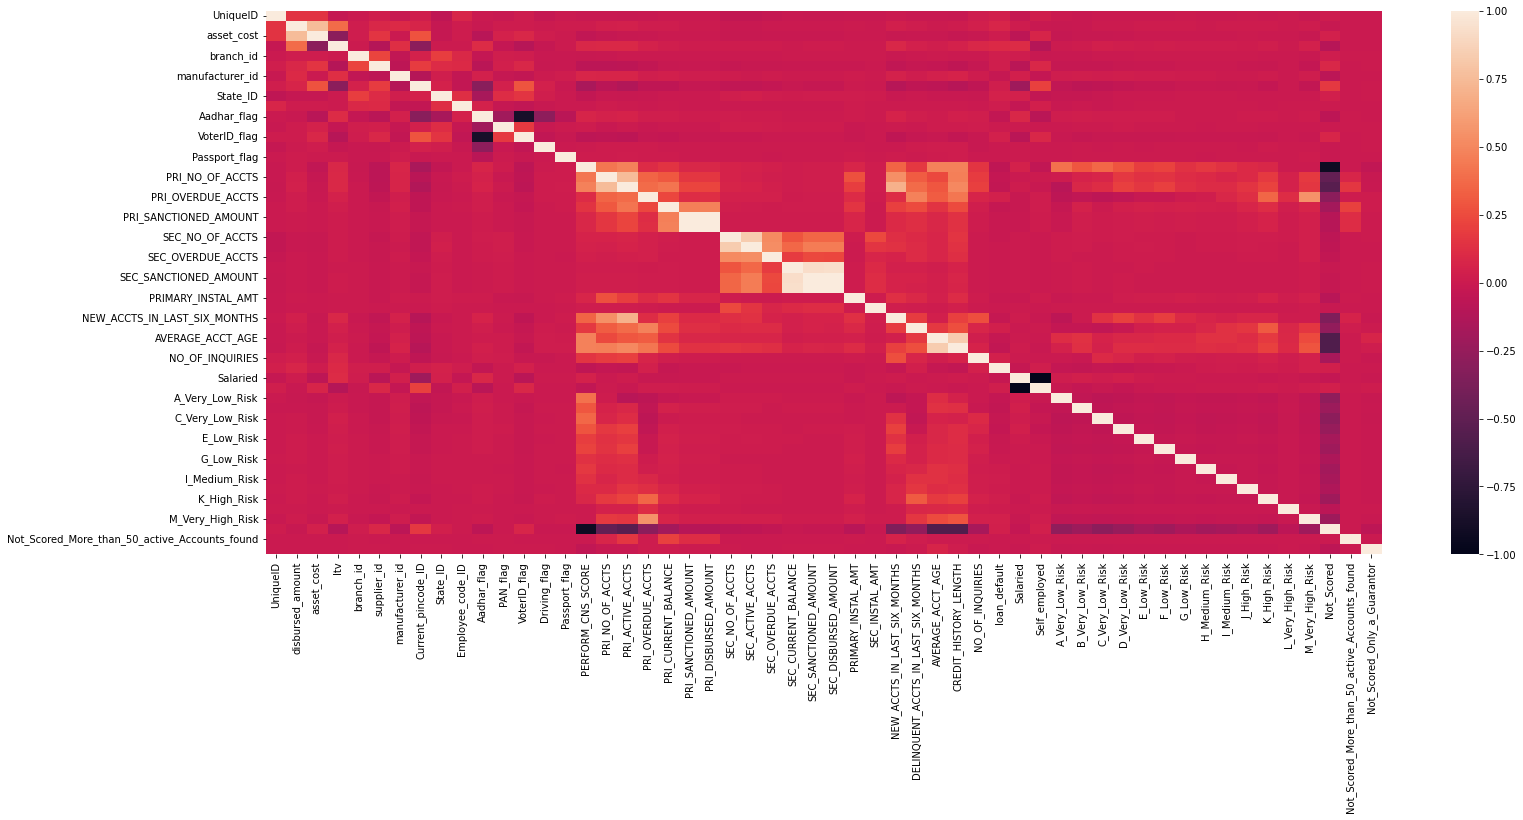

In [49]:
# to get visual of matrix about seaborn hitmap will be applied
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
sns.heatmap(tc)

Due to correlation matrix and it's visualization there are no strong correlations between loan_default variable (Y) 
and the rest of variables included into model 

Machine Learning: due to binary type of dependent variable Logistic Regression technique will be applied

In [50]:
# import packages for machine learning
from matplotlib import pyplot as plt
from sklearn. linear_model import LogisticRegression
from sklearn. model_selection import train_test_split
from sklearn. metrics import confusion_matrix

Train test split and apply 70-30 split. Name the new dataframes df_train and df_test.
Separate the dataframes into X_train, y_train, X_test, and y_test

To handle further error while building model "TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted..." we'll extract the year from datetime64 columns and convert it to int

In [51]:
df_data['Date_of_Birth']= df_data['Date_of_Birth'].dt.year
df_data['Date_of_Birth'].dtype

dtype('int64')

In [52]:
df_data['DisbursalDate']= df_data['DisbursalDate'].dt.year
df_data['DisbursalDate'].dtype

dtype('int64')

In [53]:
# before running the model copy of dataframe will be created
data=df_data.copy()

In [54]:
# create dataset with only independent variables (X)
data = data.drop(columns='loan_default')
data.shape

(233154, 55)

In [55]:
# create dataset with only dependent variables (Y)
target = pd.DataFrame(df_data.loan_default)
target.shape

(233154, 1)

In [56]:
# Separate Train Data from Test Data
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)
print("x_train shape is ", x_train.shape)
print("y_train shape is ", y_train.shape)
print("x_test shape is ", x_test.shape)
print("y_test shape is ", y_test.shape)

x_train shape is  (163207, 55)
y_train shape is  (163207, 1)
x_test shape is  (69947, 55)
y_test shape is  (69947, 1)


In [57]:
# Apply Logistic Regression and fit it
log_reg = LogisticRegression()
log_reg.fit (x_train, y_train)

C:\Users\winpr\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\winpr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
# make prediction by deploying the model using the test dataset
y_pred = log_reg.predict(x_test)

In [59]:
# Check the model accuracy by deploying Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[54675,     1],
       [15271,     0]], dtype=int64)

In [71]:
from sklearn. metrics import accuracy_score
print ("Model Accuracy Score: ", accuracy_score (y_test, y_pred))

Model Accuracy Score:  0.7816632593249174


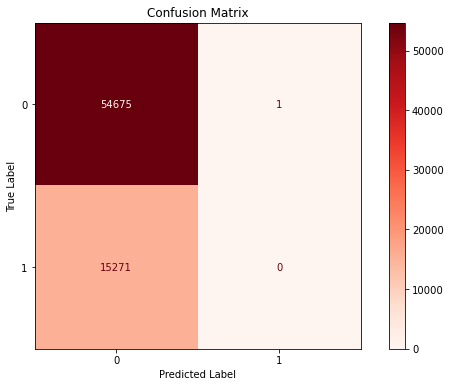

In [69]:
from sklearn. metrics import plot_confusion_matrix

matrix = plot_confusion_matrix (log_reg, x_test, y_test, cmap = plt.cm.Reds)
matrix.ax_.set_title ("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.gcf().set_size_inches(10,6)
plt.show()

Findings and conclusions: the model efficiency is following: 
        1)54675 cases was predicted as non-defaulters and they really are not (True Negativs)
        2)model predict 0 cases to be defaulters correctly (True Positivs)
        3)model made 1 faulse prediction of case to be defaulter while it actually didn't (False Positivs)
        4)model made 15271 false prediction of cases NOT to be defaulters when they actually were (False Negativs)
        
*Model efficiency can be strongly affected by dataset quality.  